# Final Project #

## Momentum Based Trading Strategies for Oil and Gas ##

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tiingo import TiingoClient
import numpy as np
from datetime import date
import warnings
import datetime as dt
import pandas_datareader as pdr
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta
config = {}

config['session'] = True

config['api_key'] = "110ee73e29ec4269f49eb85cfb4b976ab8e73361"

client = TiingoClient(config)

In [56]:
tickers = ['CL=F','SWN','EQT','OVV','CNX','HES','DINO']
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2022, 6, 1)

df = pdr.get_data_yahoo(tickers, start, end, interval="d")
df.head()

Attributes  Adj Close                                                \
Symbols          CL=F   SWN        EQT        OVV    CNX        HES   
Date                                                                  
2018-01-02  60.369999  5.91  31.070478  61.650295  15.07  44.286499   
2018-01-03  61.630001  5.91  31.234785  62.009766  15.24  45.721069   
2018-01-04  62.009998  5.86  31.255989  60.526936  15.00  46.822449   
2018-01-05  61.439999  5.59  30.641151  59.987728  14.79  48.275524   
2018-01-08  61.730000  5.73  31.128780  59.807968  14.60  48.580948   

Attributes                 Close                   ...   Open             \
Symbols          DINO       CL=F   SWN        EQT  ...    CNX        HES   
Date                                               ...                     
2018-01-02  45.698425  60.369999  5.91  31.910725  ...  14.77  47.970001   
2018-01-03  45.769699  61.630001  5.91  32.079475  ...  15.19  48.040001   
2018-01-04  45.404465  62.009998  5.86  32.101254  ...  15.24  49.430000   
2018-01-05  45.653889  61.439999  5.59  31.469788  ...  14.89  51.340000   
2018-01-08  46.072571  61.730000  5.73  31.970604  ...  14.84  52.259998   

Attributes               Volume                                               \
Symbols          DINO      CL=F         SWN        EQT        OVV        CNX   
Date                                                                           
2018-01-02  51.380001  510313.0  22829800.0  6308442.0  1839400.0  2331500.0   
2018-01-03  51.450001  673859.0  17076500.0  8126153.0  1184320.0  2044400.0   
2018-01-04  51.500000  654363.0  37444600.0  3534572.0  2759300.0  3471100.0   
2018-01-05  51.080002  563036.0  21605700.0  5829720.0  1925100.0  1797900.0   
2018-01-08  51.250000  616474.0  16131000.0  5417497.0  1739920.0  3093800.0   

Attributes                        
Symbols           HES       DINO  
Date                              
2018-01-02  2873700.0  2449500.0  
2018-01-03  3694900.0  2333300.0  
2018-01-04  3839400.0  2682600.0  
2018-01-05  7002500.0  2288700.0  
2018-01-08  3991900.0  1782800.0  

[5 rows x 42 columns]

In [57]:
price_df = df['Adj Close']
price_df = price_df.dropna()

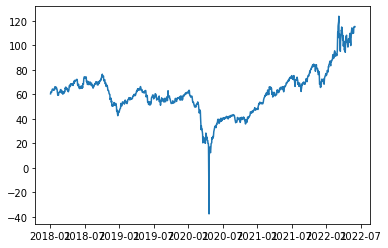

In [58]:
fig, ax = plt.subplots()
ax.plot(price_df.index, price_df['CL=F'],label='Crude Oil')


In [59]:
sma_50 = price_df.rolling(window = 50).mean()
sma_200 = price_df.rolling(window= 200).mean()

In [60]:
sma_50.head(69)

Symbols,CL=F,SWN,EQT,OVV,CNX,HES,DINO
Date,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2018-04-05,62.9036,4.1598,26.860546,50.590491,14.9762,44.564041,41.671948
2018-04-06,62.8326,4.1390,26.735135,50.338405,14.9818,44.517261,41.732265
2018-04-09,62.7908,4.1236,26.610040,50.098885,14.9898,44.485337,41.817789


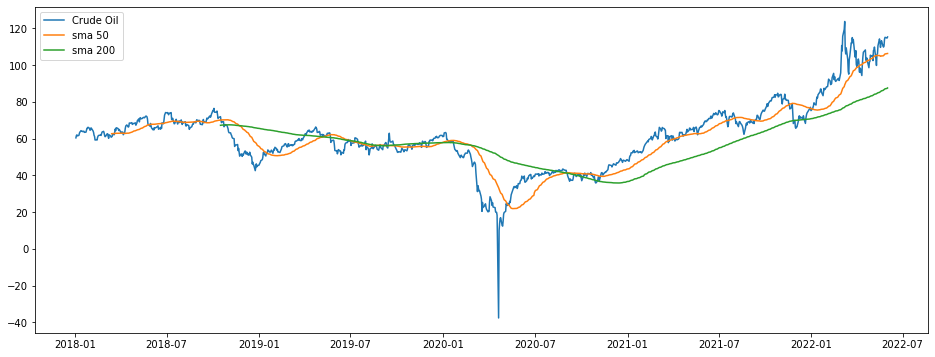

In [61]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(price_df.index, price_df['CL=F'],label='Crude Oil')
ax.plot(sma_50.index,sma_50['CL=F'],label='sma 50')
ax.plot(sma_200.index,sma_200['CL=F'],label='sma 200')
ax.legend(loc='best')

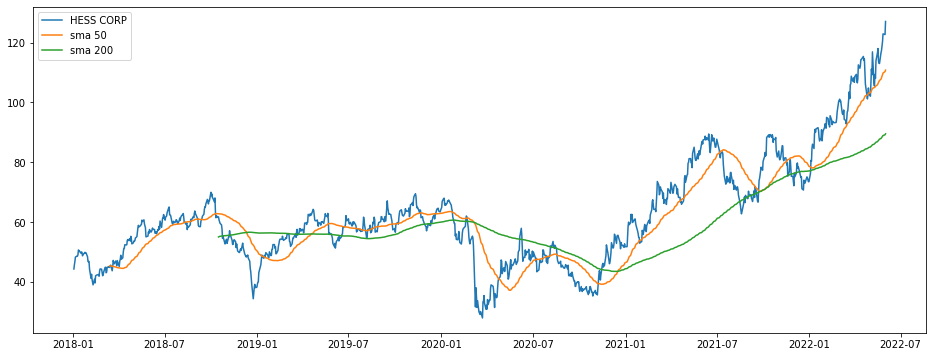

In [62]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(price_df.index, price_df['HES'],label='HESS CORP')
ax.plot(sma_50.index,sma_50['HES'],label='sma 50')
ax.plot(sma_200.index,sma_200['HES'],label='sma 200')
ax.legend(loc='best')

In [63]:
sma_50 = sma_50.rename(columns={'CL=F':'CL=F_50'
                                ,'SWN':'SWN_50'
                                ,'EQT':'EQT_50'
                                ,'OVV':'OVV_50'
                                ,'CNX':'CNX_50'
                                ,'HES':'HES_50'
                                ,'DINO':'DINO_50'})

In [64]:
sma_200 = sma_200.rename(columns={'CL=F':'CL=F_200'
                                  ,'SWN':'SWN_200'
                                  ,'EQT':'EQT_200'
                                  ,'OVV':'OVV_200'
                                  ,'CNX':'CNX_200'
                                  ,'HES':'HES_200'
                                  ,'DINO':'DINO_200'})

In [65]:
df = price_df.merge(sma_50,left_index = True,right_index = True)
df.head()

Symbols,CL=F,SWN,EQT,OVV,CNX,HES,DINO,CL=F_50,SWN_50,EQT_50,OVV_50,CNX_50,HES_50,DINO_50
Date,,,,,,,,,,,,,,
2018-01-02,60.369999,5.91,31.070478,61.650295,15.07,44.286499,45.698425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,61.630001,5.91,31.234785,62.009766,15.24,45.721069,45.769699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,62.009998,5.86,31.255989,60.526936,15.00,46.822449,45.404465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,61.439999,5.59,30.641151,59.987728,14.79,48.275524,45.653889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,61.730000,5.73,31.128780,59.807968,14.60,48.580948,46.072571,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df = df.merge(sma_200,left_index = True,right_index = True)
df = df.dropna()
df.head()

Symbols,CL=F,SWN,EQT,OVV,CNX,HES,DINO,CL=F_50,SWN_50,EQT_50,...,CNX_50,HES_50,DINO_50,CL=F_200,SWN_200,EQT_200,OVV_200,CNX_200,HES_200,DINO_200
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-16,71.919998,5.67,25.253925,51.102985,14.75,61.701412,60.915100,70.0394,5.3540,25.429468,...,14.9464,62.774568,63.340921,67.20545,4.84675,27.152915,56.069813,15.54030,54.997832,55.897349
2018-10-17,69.750000,5.49,25.147728,50.651939,14.51,60.744926,60.471397,70.0510,5.3574,25.390602,...,14.9172,62.733078,63.304520,67.25235,4.84465,27.123302,56.014821,15.53750,55.080124,55.971213
2018-10-18,68.650002,5.55,24.786652,50.110699,14.45,60.116673,61.530865,70.0852,5.3598,25.349716,...,14.8878,62.703683,63.283719,67.28745,4.84285,27.091061,55.955325,15.53355,55.152102,56.050019
2018-10-19,69.120003,5.56,24.627356,50.471523,14.54,59.600929,57.202431,70.1314,5.3626,25.311803,...,14.8582,62.700031,63.195458,67.32300,4.84135,27.057918,55.905048,15.53125,55.215994,56.109009
2018-10-22,69.169998,5.37,23.591923,50.742149,14.30,59.019543,58.678452,70.1622,5.3588,25.254668,...,14.8284,62.679707,63.124820,67.36165,4.84025,27.022672,55.858820,15.52880,55.269714,56.174132


In [69]:
ticker_list = ['SWN','EQT','OVV','CNX','HES','DINO']
df['CF=L_trade'] = np.where(df['CL=F_50']>= df['CL=F_200'],1,0)
for i in tickers:
    df[i+'_trade'] = np.where(df[i+'_50'] >= df[i+'_200'],'long','short')

        
df.head()    

                

Symbols,CL=F,SWN,EQT,OVV,CNX,HES,DINO,CL=F_50,SWN_50,EQT_50,...,HES_200,DINO_200,CF=L_trade,CL=F_trade,SWN_trade,EQT_trade,OVV_trade,CNX_trade,HES_trade,DINO_trade
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-16,71.919998,5.67,25.253925,51.102985,14.75,61.701412,60.915100,70.0394,5.3540,25.429468,...,54.997832,55.897349,1,long,long,short,long,short,long,long
2018-10-17,69.750000,5.49,25.147728,50.651939,14.51,60.744926,60.471397,70.0510,5.3574,25.390602,...,55.080124,55.971213,1,long,long,short,long,short,long,long
2018-10-18,68.650002,5.55,24.786652,50.110699,14.45,60.116673,61.530865,70.0852,5.3598,25.349716,...,55.152102,56.050019,1,long,long,short,long,short,long,long
2018-10-19,69.120003,5.56,24.627356,50.471523,14.54,59.600929,57.202431,70.1314,5.3626,25.311803,...,55.215994,56.109009,1,long,long,short,long,short,long,long
2018-10-22,69.169998,5.37,23.591923,50.742149,14.30,59.019543,58.678452,70.1622,5.3588,25.254668,...,55.269714,56.174132,1,long,long,short,long,short,long,long


In [105]:
profit = []
for j in ticker_list:
    a = df[j].to_list()
    b = df[j+'_50'].to_list()
    c = df[j+'_200'].to_list()
    d = df[j+'_trade'].to_list()
    deposit = 0
    withdraw = 0
    
    for i in range(0,len(a)):
        if i == 0:
            if d[i] == 'long':
                deposit += a[i]
        elif i < len(a)-1:
            if d[i] == 'long' and d[i-1] == 'short':
                deposit += a[i]
            elif d[i] == 'short' and d[i-1] == 'long':
                withdraw += a[i]
        elif i == len(a)-1 and d[i] == 'long':
            withdraw += a[i]
    profit.append(round(((withdraw - deposit)/deposit) * 100,2))

res = {ticker_list[i]: profit[i] for i in range(len(ticker_list))}
print(res)

{'SWN': 10.86, 'EQT': 268.75, 'OVV': 70.29, 'CNX': 30.65, 'HES': 15.0, 'DINO': -0.82}


In [114]:
b=0
print("Annual Returns for momentum trading strategy")
for i in ticker_list:
    a = df[i].to_list()
    yrs = len(a)/250
    
    b += res[i]/yrs
    print(f"{i}: {round(res[i]/yrs,2)}%")
print(f"\nTotal Annual Returns assuming equal units: {round(b/len(ticker_list),2)}%")


Annual Returns for momentum trading strategy
SWN: 2.97%
EQT: 73.59%
OVV: 19.25%
CNX: 8.39%
HES: 4.11%
DINO: -0.22%

Total Annual Returns assuming equal units: 18.01%
